In [ ]:
# The main differentiator between the Merton Jump Diffusion model
# and traditional Black-Scholes is the compound Poisson Jump process
# with parameters lambda, mu_j, and sigma_j for the frequency of jumps,
# the mean size of a jump, and std deviation of a jump, respectively.
# MJD has previously captured excess kurtosis of log returns which Black-Scholes, 
# derived from a log normal distribution, fundamentally cannot, 
# and has the potential to capture different levels of skewness.
# See https://www.maxmatsuda.com/Papers/Intro/Intro%20to%20MJD%20Matsuda.pdf.


Text(0.5, 1.0, 'Merton Jump Diffusion Price Movement of a Stock')

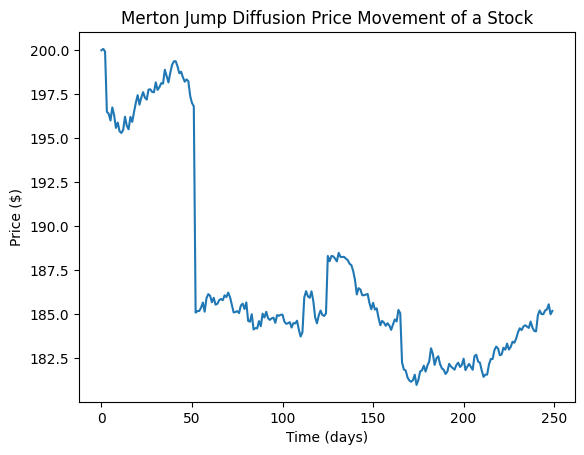

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt


# MJD simulates a jump diffusion process for a security S with initial price S0 over a time time with simulation_per_period number of simulations.
# we omit the -lambda E[J-1] where J is the size of a jump because of a lack of clarity of its relevance. 
def mjd(S0, mu_d, sig_d, lam, mu_j, sig_j, time, simulations_per_period): 
    dt = time/simulations_per_period
    S = [0]*simulations_per_period
    S[0] = S0
    for i in range(1,simulations_per_period):
        S[i] = S[i-1]*math.exp((mu_d-sig_d**2/2)*dt + sig_d*np.random.normal(0,dt))*np.prod(np.random.normal(1 + mu_j,sig_j, size = np.random.poisson(lam*dt)))
    return(S)

plt.plot(mjd(200, .125, .5, 4, 0, .02, 1, 250))
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.title('Merton Jump Diffusion Price Movement of a Stock')


In [1]:
# The estimator for the MJD model is a lot more messy than for Black-Scholes
# as the Poisson jumps create a likelihood function that has infinitely many terms.
# Some approaches for estimation are discussed here: https://quant.stackexchange.com/questions/60260/efficient-way-to-perform-mle-on-merton-jump-diffusion-model-parameters.